<a href="https://colab.research.google.com/github/FunminiyiO/Arduino/blob/master/Daily_RF_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')#
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
data = pd.read_csv('/Users/HP/Desktop/Folders/Work in Progress/DSN Work/AGRO AI/Weather data/Weather Data/Project Datasets/rain_cated_2.csv')

In [3]:
data.head()

,temp,hum,dp,press,cat
0,2,4,3,3,0
1,1,5,3,4,0
2,1,5,3,3,0
3,1,5,3,3,0
4,1,5,3,3,0


In [0]:
#data = data.drop("cat", 1)

In [0]:
data['1'] = round(30 + ((data['temp']) -  2 *(data['dp'])), 0)
data['3'] = round(30 + ((data['press']) - (1.2*data['temp'])), 0)
data['4'] =  round(((data['press']) + (1.2*(data['dp']))), 0)
data['5'] = round(20 + ((data['4']) - data['3'])/2, 0)
data['6'] = round(-1*((data['dp']) - data['1'])/2, 0)

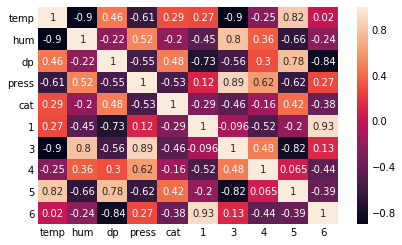

In [6]:
sns.heatmap(data.corr(), annot=True)

In [7]:
data['6'].value_counts()

12.0    1612
11.0     635
10.0     601
14.0     301
13.0     168
9.0       65
8.0       45
16.0      15
15.0       4
18.0       3
Name: 6, dtype: int64

In [0]:
target = data['cat'] 

In [0]:
data = data.drop("cat", 1)

In [0]:
x = data
y = target

from imblearn.over_sampling import SMOTE, ADASYN
x_resampled, y_resampled = SMOTE().fit_resample(x, y)
x = x_resampled
target = y_resampled

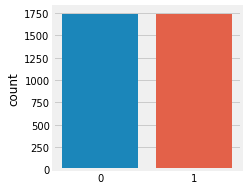

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(target)

In [12]:
data.head()

,temp,hum,dp,press,1,3,4,5,6
0,2,4,3,3,26,31.0,7.0,8.0,12.0
1,1,5,3,4,25,33.0,8.0,8.0,11.0
2,1,5,3,3,25,32.0,7.0,8.0,11.0
3,1,5,3,3,25,32.0,7.0,8.0,11.0
4,1,5,3,3,25,32.0,7.0,8.0,11.0


In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, target, test_size = 0.1, random_state = 0)

In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# xTrain = scaler.fit_transform(xTrain)
# xTest = scaler.fit_transform(xTest)

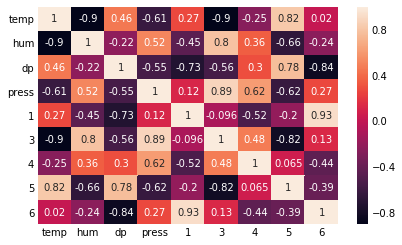

In [15]:
sns.heatmap(data.corr(), annot=True)

In [0]:
from sklearn.metrics import roc_auc_score,f1_score ,accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

# KNN


In [17]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=26) # 1-26
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_neighbors': [26, 100,200],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [5,6,7,8,9],
    # 'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(model1, param_grid, cv=5, verbose=4, n_jobs=-1)
model1 = grid_search.fit(xTrain, yTrain)

y_pred= model1.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[[148  37]
 [ 42 121]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       185
           1       0.77      0.74      0.75       163

    accuracy                           0.77       348
   macro avg       0.77      0.77      0.77       348
weighted avg       0.77      0.77      0.77       348

0.7729885057471264


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.0s finished


# GBoost

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=150,max_features='auto',max_depth=8,learning_rate=0.08,random_state=5)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6],
    # 'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(model2, param_grid, cv=5, verbose=4, n_jobs=-1)
model2 = grid_search.fit(xTrain, yTrain)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 40}
0.7694763729246488


In [19]:
y_pred= model2.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[149  36]
 [ 36 127]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       185
           1       0.78      0.78      0.78       163

    accuracy                           0.79       348
   macro avg       0.79      0.79      0.79       348
weighted avg       0.79      0.79      0.79       348

0.7931034482758621


# ADABoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
model3 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [350,400,450],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [5,6,7,8,9],
    # 'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(model3, param_grid, cv=6, verbose=5, n_jobs=-1)
model3 = grid_search.fit(xTrain, yTrain)

print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 6 folds for each of 3 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   10.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   11.6s finished


{'n_estimators': 450}
0.7659642401021711


In [22]:
y_pred= model3.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[151  34]
 [ 43 120]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       185
           1       0.78      0.74      0.76       163

    accuracy                           0.78       348
   macro avg       0.78      0.78      0.78       348
weighted avg       0.78      0.78      0.78       348

0.7787356321839081


# RF

In [0]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=92, random_state=0,max_depth=9,max_features=8,min_samples_leaf=4,min_samples_split=6,bootstrap=False)
model4 = model4.fit(xTrain, yTrain)

In [24]:
y_pred= model4.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[150  35]
 [ 35 128]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       185
           1       0.79      0.79      0.79       163

    accuracy                           0.80       348
   macro avg       0.80      0.80      0.80       348
weighted avg       0.80      0.80      0.80       348

0.7988505747126436


# LR

In [0]:
from sklearn.linear_model import LogisticRegression

In [26]:
model5 = LogisticRegression(random_state=42,C=1000)
model5.fit(xTrain,yTrain)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred= model5.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[146  39]
 [ 38 125]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       185
           1       0.76      0.77      0.76       163

    accuracy                           0.78       348
   macro avg       0.78      0.78      0.78       348
weighted avg       0.78      0.78      0.78       348

0.7787356321839081


# SVC

In [28]:
from sklearn.svm import SVC
model6 = SVC(C=5.0, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model6.fit(xTrain,yTrain)

SVC(C=5.0, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred= model6.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[147  38]
 [ 38 125]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       185
           1       0.77      0.77      0.77       163

    accuracy                           0.78       348
   macro avg       0.78      0.78      0.78       348
weighted avg       0.78      0.78      0.78       348

0.7816091954022989


# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
model7 = GaussianNB()
model7.fit(xTrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred= model7.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[155  30]
 [ 52 111]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       185
           1       0.79      0.68      0.73       163

    accuracy                           0.76       348
   macro avg       0.77      0.76      0.76       348
weighted avg       0.77      0.76      0.76       348

0.764367816091954


# Combining


In [39]:
from sklearn.ensemble import VotingClassifier
# model1 = model1
# model2 = model2
# model3 = model3
# model4 = model4
# model5 = model5
# model6 = model6
# model7 = model7
model = VotingClassifier(estimators=[('4', model4), ('2', model2),('6', model6)], voting='hard')
model.fit(xTrain,yTrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


VotingClassifier(estimators=[('4',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=9,
                                                     max_features=8,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=6,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=92,
                                                     n_jobs=None,
                   

In [40]:
y_pred= model.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[150  35]
 [ 36 127]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       185
           1       0.78      0.78      0.78       163

    accuracy                           0.80       348
   macro avg       0.80      0.79      0.80       348
weighted avg       0.80      0.80      0.80       348

0.7959770114942529


In [38]:
# pred2=model2.predict(xTest)
# pred4=model4.predict(xTest)
# pred6=model6.predict(xTest)
# finalpred = []
# total_prediction = (pred2+pred4+pred6)
# for unit in total_prediction:
#   prediction = (unit)/3
#   if prediction > 0:
#     value = 1
#     finalpred.append(value)
#   else:
#     other_value = 0
#     finalpred.append(other_value)
# y_pred = pd.DataFrame(finalpred)  
# print(confusion_matrix(yTest,y_pred))
# print(classification_report(yTest,y_pred))
# print(accuracy_score(yTest,y_pred))

[[144  41]
 [ 32 131]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       185
           1       0.76      0.80      0.78       163

    accuracy                           0.79       348
   macro avg       0.79      0.79      0.79       348
weighted avg       0.79      0.79      0.79       348

0.7902298850574713
